# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [140]:
# Import your libraries
from scipy.stats import poisson
from scipy.stats import norm
import scipy
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [139]:
# Your code here
def randsamp(size):
    return scipy.stats.normaltest(np.random.normal(50,5,size))

size10 = randsamp(10)
size50 = randsamp(50)
size500 = randsamp(500)
size5000 = randsamp(5000)

display(size10)
display(size50)
display(size500)
display(size5000)

NormaltestResult(statistic=0.43812532711625285, pvalue=0.8032713807336241)

NormaltestResult(statistic=0.6322128309394872, pvalue=0.7289818710916434)

NormaltestResult(statistic=2.5400691645497266, pvalue=0.2808219101499711)

NormaltestResult(statistic=0.19562022647289862, pvalue=0.9068210807264783)

#### Interpret the normaltest results and make your observations.

In [19]:
"""El p valor que obtenemos es la probabilidad de que los datos esten normalmente distribuidos. Mientras mas datos
generamos, mas alto deberia ser el pvalor dado que sabemos que los datos provienen de un generador de datos distribuidos
normalmente""".


#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

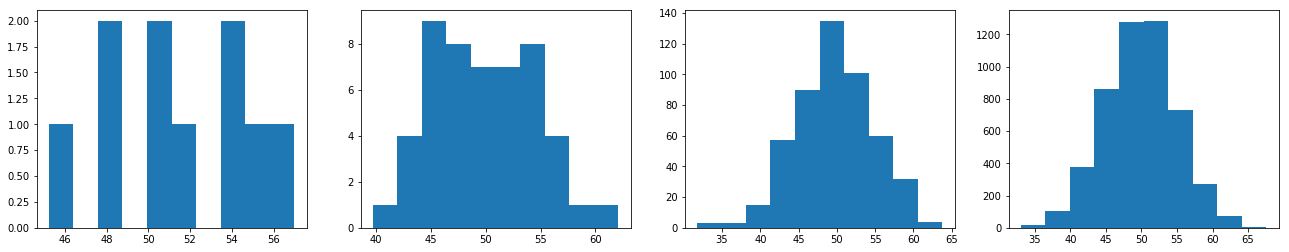

In [66]:
def randsamp2(size):
    return np.random.normal(50,5,size)

size10 = randsamp2(10)
size50 = randsamp2(50)
size500 = randsamp2(500)
size5000 = randsamp2(5000)

fig,ax = plt.subplots(1,4)
ax[0].hist(size10)
ax[1].hist(size50)
ax[2].hist(size500)
ax[3].hist(size5000)
plt.subplots_adjust(right=3)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
"""
Mientras mas datos hayan pues la distribución más se aproxima a una de distribucion normal. 
En condiciones generales cuando sumas n variables aleatorias independientes y con varianza finita y distinta 0,
su funcion de distribucion se aproximará a la normal siempre y cuando la suma de estas variables sea 
suficientemente grande
"""

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

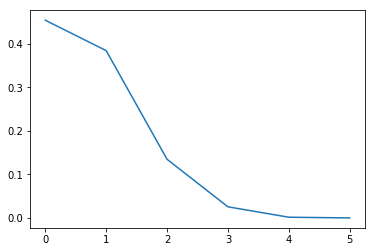

In [136]:
# Me creo funciones para graficar, se que hay una forma de hacerlo automatico, las proximas las resuelvo asi.
dist = binom.rvs(5, 0.15, size=10000)

def numb_bin(number):
    return len([a for a in dist if a ==number])/10000

def grafica(size,vacia=[]):
    for visitores in range(size+1):
        vacia.append(numb_bin(visitores))
    return plt.plot(vacia)
      
grafica(5)


#### Explain what you observe from the plot above

In [ ]:
"""Lo más probable, si tengo a 5 personas es que ninguno de ellos haya hecho click,al final esto tiene sentido pq
la probabilidad individual de hacer click es solo del 15%, luego las probabilidades de que mas personas hagan click
va disminuyendo, de hecho vemos q la posibilidad de q las 5 hayan visto es casi 0 que seria igual a (0.15)^5.

#### Now plot PMP with 50, 500, and 5000 visitors.

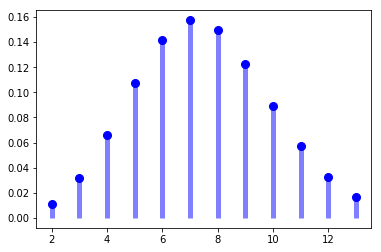

In [112]:
# 50 personas
fig, ax = plt.subplots(1, 1)
n = 50
p =0.15
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

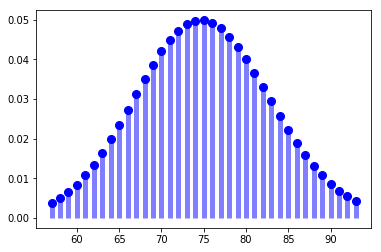

In [113]:
#500 personas 
fig, ax = plt.subplots(1, 1)
n = 500
p =0.15
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

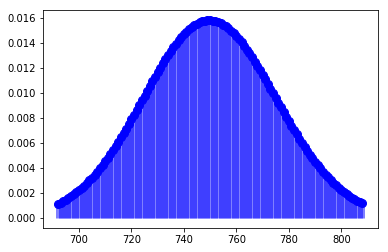

In [114]:
# 5000 personas
fig, ax = plt.subplots(1, 1)
n = 5000
p =0.15
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
"""Nuevamente vemos que mientras mas datos hayan pues la distribución más se aproxima a una de distribucion 
normal, tal y como lo establece el teorema central del limite""". 

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Es el numero de veces que ocurre un evento en un intervalo de tiempo cuando conoces el promedio de veces que
# ocurre el evento en un intervalo de tiempo determinado. 

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [152]:
r = poisson.rvs(300, size=1000)
def numb_binp(number):
    return len([a for a in r if a ==number])/10000

display(numb_binp(320)) # muy baja, cercana al 0.15%

0.0019

#### What is the probability of getting 60 visits?

In [154]:
display(numb_binp(60)) # Increiblemente baja, practicamente 0.

0.0

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

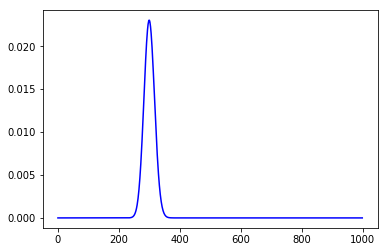

In [161]:
# your code here
fig, ax = plt.subplots(1, 1)
mu=300
x = np.arange(0,1000)
ax.plot(x, poisson.pmf(x, mu), 'b', ms=8, label='poisson pmf')
#ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)